<div class="alert alert-danger">
    <h4 style="font-weight: bold; font-size: 28px;">Exploratory Data Analysis of Raw Data</h4>
    <p style="font-size: 20px;">Basketball Reference Data (2000-2024)</p>
</div>

<a name="EDA"></a>

# Table of Contents

[Setup](#Setup)

**[1. Season Schedule](#1.-Season-Schedule)**

- [1.1. Descriptives](#1.1.-Descriptives)
  
**[2. Team Box Scores](#2.-Team-Box-Scores)**

- [2.1. Descriptives](#2.1.-Descriptives)

- [2.2. Univariate EDA](#2.2.-Univariate-EDA)

- [2.3. Multivariate EDA](#2.3.-Multivariate-EDA)

**[3. Player Box Scores](#3.-Player-Box-Scores)**

- [3.1. Descriptives](#3.1.-Descriptives)

- [3.2. Univariate EDA](#3.2.-Univariate-EDA)

- [3.3. Multivariate EDA](#3.3.-Multivariate-EDA)

**[4. Player Season Totals (Basic)](#4.-Player-Season-Totals-(Basic))**

**[5. Player Season Totals (Advanced)](#5.-Player-Season-Totals-(Advanced))**

# Setup

[Return to top](#EDA)

In [ ]:
# basic modules
import os
import time
import random as rn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# plotting style
plt.style.use('seaborn-v0_8-notebook')
sns.set_style('white')
#sns.set_style('darkgrid')

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# warnings
import warnings
warnings.filterwarnings("ignore")

# user defined functions
import utility_functions as utl

<a name="1.-Season-Schedule"></a>
# 1. Season Schedule

[Return to top](#EDA)

In [47]:
schedule_df = pd.read_csv('../data/original/br_season_schedule_2000_2024.csv')

<a name="1.1.-Descriptives"></a>
## 1.1. Descriptives

[Return to top](#EDA)

In [3]:
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30752 entries, 0 to 30751
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           30752 non-null  int64 
 1   date             30752 non-null  object
 2   start_time       30752 non-null  object
 3   home_team        30752 non-null  object
 4   away_team        30752 non-null  object
 5   home_team_score  30752 non-null  int64 
 6   away_team_score  30752 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.6+ MB


In [4]:
schedule_df.head()

,season,date,start_time,home_team,away_team,home_team_score,away_team_score
0,2000,1999-11-02,1999-11-02 05:00:00+00:00,Charlotte Hornets,Orlando Magic,100,86
1,2000,1999-11-02,1999-11-02 05:00:00+00:00,Dallas Mavericks,Golden State Warriors,108,96
2,2000,1999-11-02,1999-11-02 05:00:00+00:00,Denver Nuggets,Phoenix Suns,107,102
3,2000,1999-11-02,1999-11-02 05:00:00+00:00,Houston Rockets,Milwaukee Bucks,93,98
4,2000,1999-11-02,1999-11-02 05:00:00+00:00,Los Angeles Clippers,Seattle Supersonics,92,104


In [5]:
schedule_df.describe()

,season,home_team_score,away_team_score
count,30752.000,30752.000,30752.000
mean,2011.483,102.942,99.994
std,6.902,13.403,13.520
min,2000.000,56.000,53.000
25%,2006.000,94.000,91.000
50%,2011.000,103.000,99.000
75%,2017.000,112.000,109.000
max,2023.000,175.000,176.000


<a name="2.-Team-Box-Scores"></a>
# 2. Team Box Scores

[Return to top](#EDA)

In [2]:
team_bs_df = pd.read_csv('../../data/original/br_team_box_scores_2000_2024.csv')

<a name="2.1.-Descriptives"></a>
## 2.1. Descriptives

[Return to top](#EDA)

In [7]:
team_bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62466 entries, 0 to 62465
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   date                               62466 non-null  object
 1   team                               62466 non-null  object
 2   outcome                            62466 non-null  object
 3   minutes_played                     62466 non-null  int64 
 4   made_field_goals                   62466 non-null  int64 
 5   attempted_field_goals              62466 non-null  int64 
 6   made_three_point_field_goals       62466 non-null  int64 
 7   attempted_three_point_field_goals  62466 non-null  int64 
 8   made_free_throws                   62466 non-null  int64 
 9   attempted_free_throws              62466 non-null  int64 
 10  offensive_rebounds                 62466 non-null  int64 
 11  defensive_rebounds                 62466 non-null  int64 
 12  assi

In [8]:
team_bs_df.head()

,date,team,outcome,minutes_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
0,1999-11-02,Orlando Magic,Loss,240,34,80,0,8,18,27,12,36,17,9,4,22,31,86
1,1999-11-02,Charlotte Hornets,Win,240,34,82,10,22,22,37,14,33,25,13,5,21,25,100
2,1999-11-02,Golden State Warriors,Loss,240,34,82,7,18,21,27,18,33,14,4,2,23,29,96
3,1999-11-02,Dallas Mavericks,Win,240,39,85,2,15,28,34,11,30,22,11,6,13,19,108
4,1999-11-02,Phoenix Suns,Loss,265,43,111,9,22,7,14,21,37,29,9,5,13,28,102


In [9]:
team_bs_df.describe()

,minutes_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,points
count,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000,62466.000
mean,241.757,37.805,83.167,7.892,22.115,18.183,23.921,11.006,31.699,22.288,7.561,4.896,13.738,21.002,101.684
std,7.438,5.485,8.003,4.224,9.632,6.205,7.646,3.982,5.491,5.253,2.911,2.573,3.886,4.500,13.633
min,240.000,16.000,51.000,0.000,1.000,1.000,1.000,0.000,12.000,3.000,0.000,0.000,1.000,5.000,53.000
25%,240.000,34.000,78.000,5.000,15.000,14.000,19.000,8.000,28.000,19.000,5.000,3.000,11.000,18.000,92.000
50%,240.000,38.000,83.000,7.000,21.000,18.000,23.000,11.000,32.000,22.000,7.000,5.000,14.000,21.000,101.000
75%,240.000,41.000,88.000,10.000,29.000,22.000,29.000,13.000,35.000,26.000,9.000,6.000,16.000,24.000,111.000
max,340.000,65.000,129.000,29.000,70.000,52.000,64.000,38.000,60.000,50.000,22.000,23.000,32.000,43.000,176.000


In [10]:
# missing values table
utl.get_missing_values(team_bs_df)

,Missing Values,% of Total Values


<a name="2.2.-Univariate-EDA"></a>
## 2.2. Univariate EDA

[Return to top](#EDA)

In [3]:
# get numeric variables
num_vars_team_bs = team_bs_df.select_dtypes(include=['int64', 'float64']).columns
print('Number of numeric variables:', len(num_vars_team_bs))

Number of numeric variables: 15


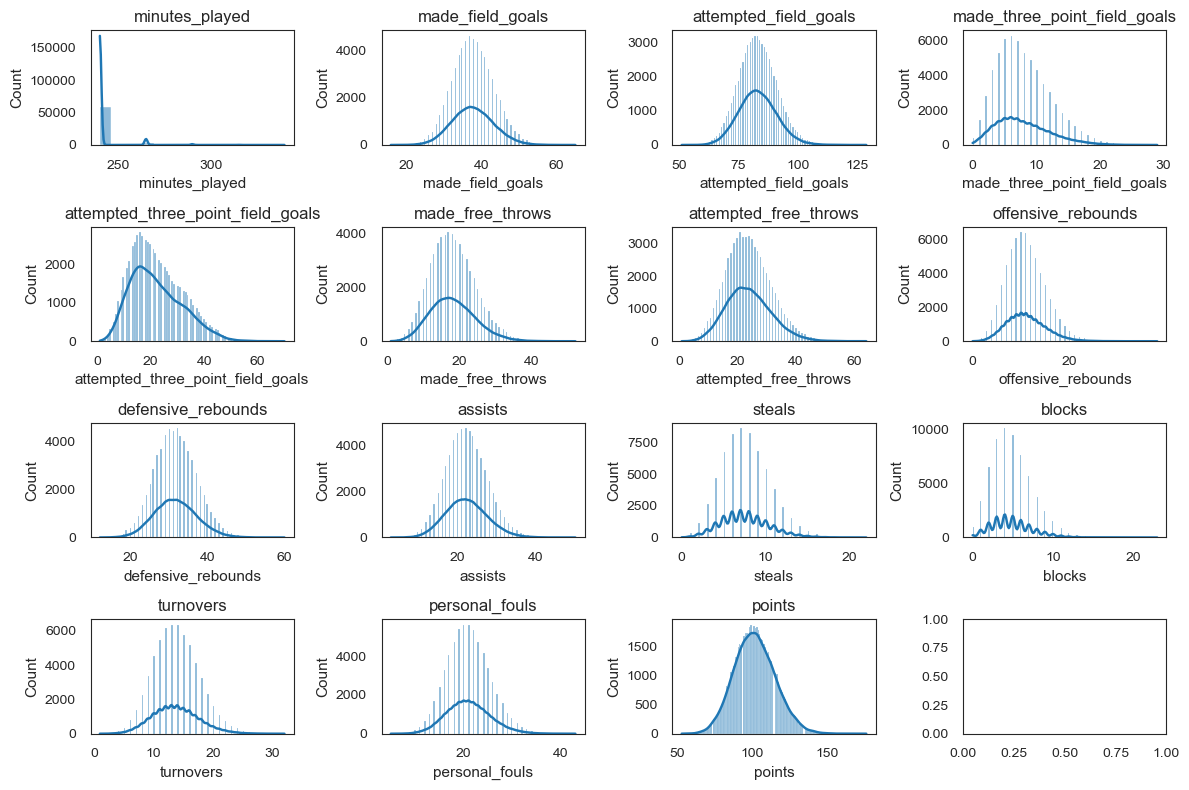

In [12]:
# histograms for each numeric column
fig, axes = plt.subplots(4, 4, figsize=(12, 8))
for ax, column in zip(axes.flatten(), num_vars_team_bs):
    sns.histplot(team_bs_df[column], kde=True, ax=ax) 
    ax.set_title(f'{column}')
plt.tight_layout();

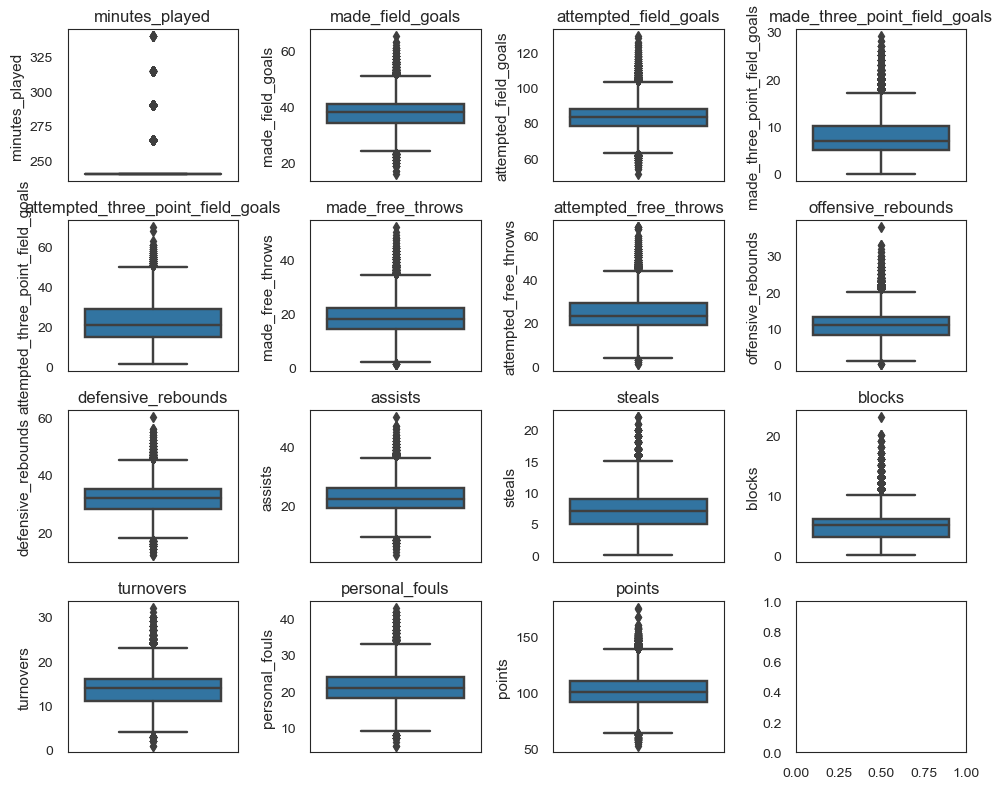

In [13]:
# boxplots for each numeric column
fig, axes = plt.subplots(4, 4, figsize=(10, 8))
for ax, column in zip(axes.flatten(), num_vars_team_bs):
    sns.boxplot(y=column, data=team_bs_df, ax=ax)
    ax.set_title(f'{column}')
plt.tight_layout();

<a name="2.3.-Multivariate-EDA"></a>
## 2.3. Multivariate EDA

[Return to top](#EDA)

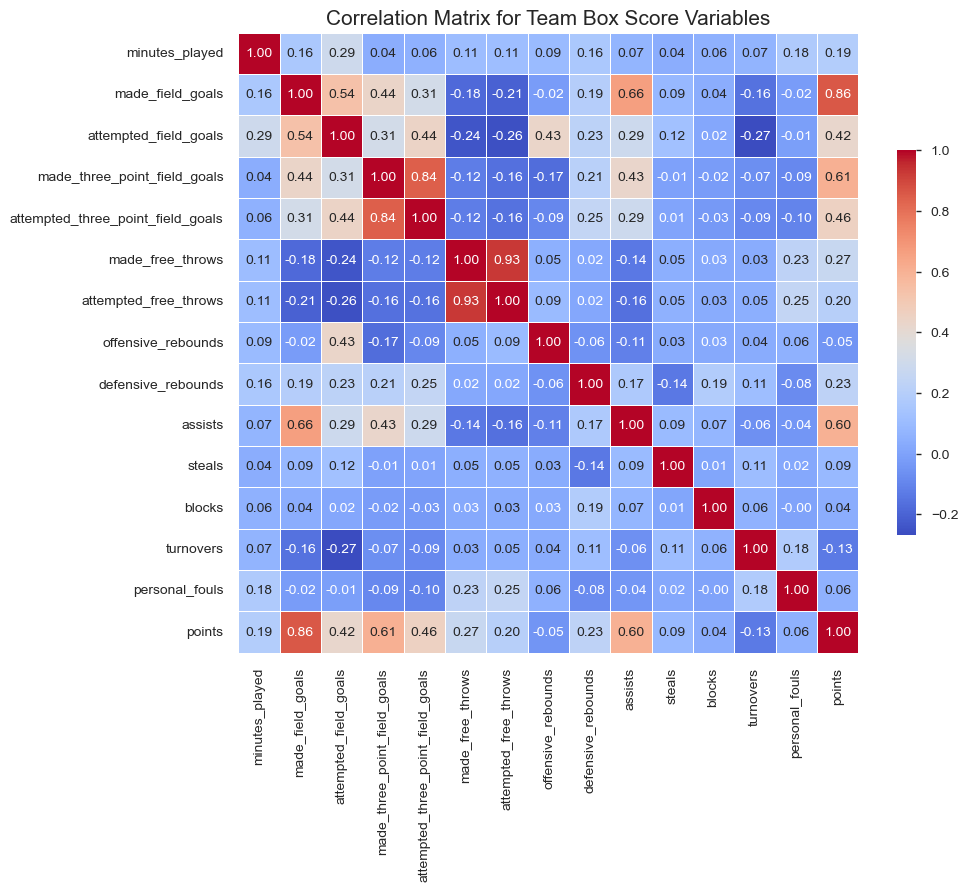

In [4]:
# correlations
plt.figure(figsize=(10, 10))
sns.heatmap(team_bs_df[num_vars_team_bs].corr(), annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for Team Box Score Variables', fontsize=15);

<a name="3.-Player-Box-Scores"></a>
# 3. Player Box Scores

[Return to top](#EDA)

In [5]:
player_bs_df = pd.read_csv('../../data/original/br_player_box_scores_2000_2024.csv')

<a name="3.1.-Descriptives"></a>
## 3.1. Descriptives

[Return to top](#EDA)

In [16]:
player_bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645871 entries, 0 to 645870
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   date                               645871 non-null  object 
 1   slug                               645871 non-null  object 
 2   name                               645871 non-null  object 
 3   team                               645871 non-null  object 
 4   location                           645871 non-null  object 
 5   opponent                           645871 non-null  object 
 6   outcome                            645871 non-null  object 
 7   seconds_played                     645871 non-null  int64  
 8   made_field_goals                   645871 non-null  int64  
 9   attempted_field_goals              645871 non-null  int64  
 10  made_three_point_field_goals       645871 non-null  int64  
 11  attempted_three_point_field_goals  6458

In [17]:
player_bs_df.head()

,date,slug,name,team,location,opponent,outcome,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,game_score
0,1999-11-02,cassesa01,Sam Cassell,Milwaukee Bucks,Away,Houston Rockets,Win,2250,15,20,0,1,5,7,1,2,11,1,0,4,5,30.2
1,1999-11-02,vanexni01,Nick Van Exel,Denver Nuggets,Home,Phoenix Suns,Win,2733,12,21,5,7,5,7,2,7,9,0,0,3,1,29.7
2,1999-11-02,piercpa01,Paul Pierce,Boston Celtics,Away,Toronto Raptors,Win,2273,12,19,3,4,3,6,1,7,5,2,0,2,3,25.4
3,1999-11-02,odomla01,Lamar Odom,Los Angeles Clippers,Home,Seattle Supersonics,Loss,2607,10,18,2,5,8,15,2,10,3,2,2,3,1,25.1
4,1999-11-02,hillgr01,Grant Hill,Detroit Pistons,Away,Miami Heat,Loss,3134,16,35,1,3,8,11,3,6,5,0,1,4,5,23.8


In [18]:
player_bs_df.describe()

,seconds_played,made_field_goals,attempted_field_goals,made_three_point_field_goals,attempted_three_point_field_goals,made_free_throws,attempted_free_throws,offensive_rebounds,defensive_rebounds,assists,steals,blocks,turnovers,personal_fouls,game_score
count,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000,645871.000
mean,1402.908,3.656,8.044,0.763,2.139,1.759,2.314,1.064,3.066,2.156,0.731,0.474,1.329,2.031,7.540
std,687.584,3.094,5.825,1.225,2.574,2.386,2.928,1.427,2.716,2.521,0.984,0.885,1.411,1.514,7.293
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-11.700
25%,890.000,1.000,3.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.800
50%,1438.000,3.000,7.000,0.000,1.000,1.000,2.000,1.000,2.000,1.000,0.000,0.000,1.000,2.000,6.100
75%,1953.000,5.000,12.000,1.000,4.000,3.000,4.000,2.000,4.000,3.000,1.000,1.000,2.000,3.000,11.800
max,3898.000,28.000,50.000,14.000,24.000,26.000,39.000,18.000,25.000,25.000,10.000,12.000,14.000,7.000,63.500


In [19]:
# missing values table
utl.get_missing_values(player_bs_df)

,Missing Values,% of Total Values


<a name="3.2.-Univariate-EDA"></a>
## 3.2. Univariate EDA

[Return to top](#EDA)

In [6]:
# get numeric variables
num_vars_player_bs = player_bs_df.select_dtypes(include=['int64', 'float64']).columns
print('Number of numeric variables:', len(num_vars_player_bs))

Number of numeric variables: 15


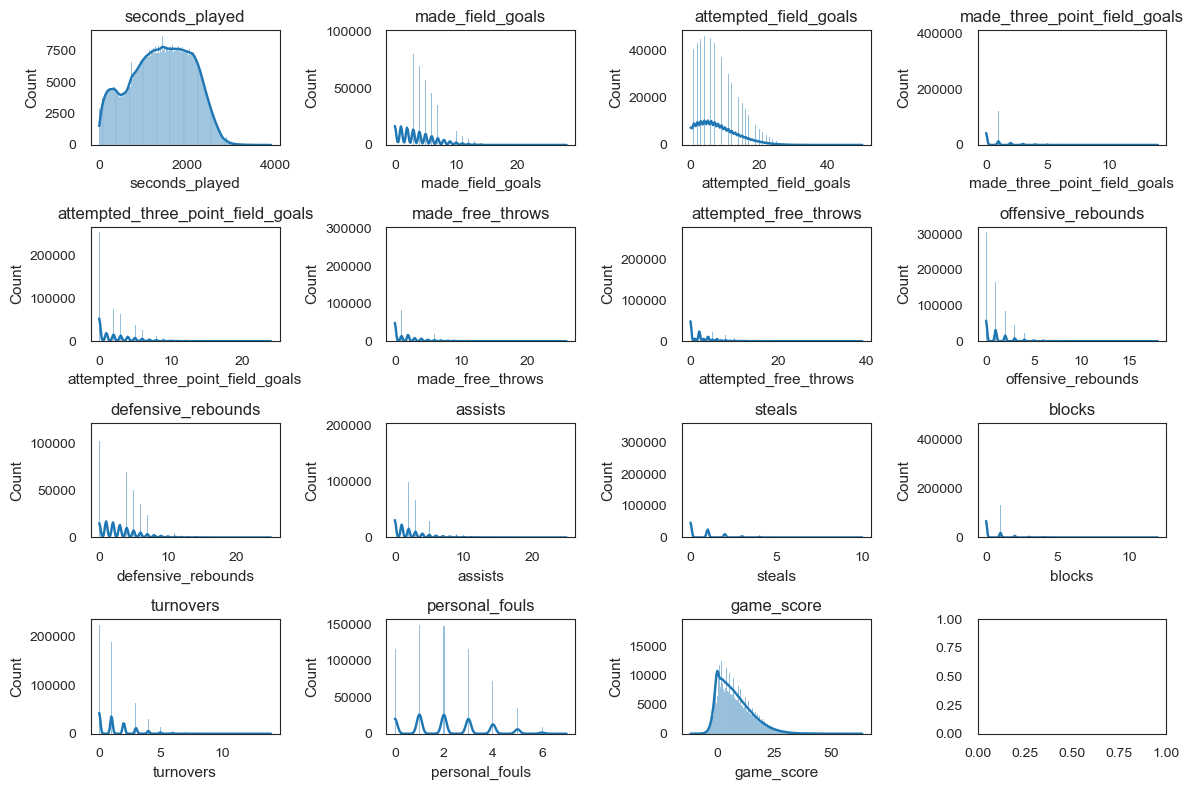

In [21]:
# histograms for each numeric column
fig, axes = plt.subplots(4, 4, figsize=(12, 8))
for ax, column in zip(axes.flatten(), num_vars_player_bs):
    sns.histplot(player_bs_df[column], kde=True, ax=ax) 
    ax.set_title(f'{column}')
plt.tight_layout();

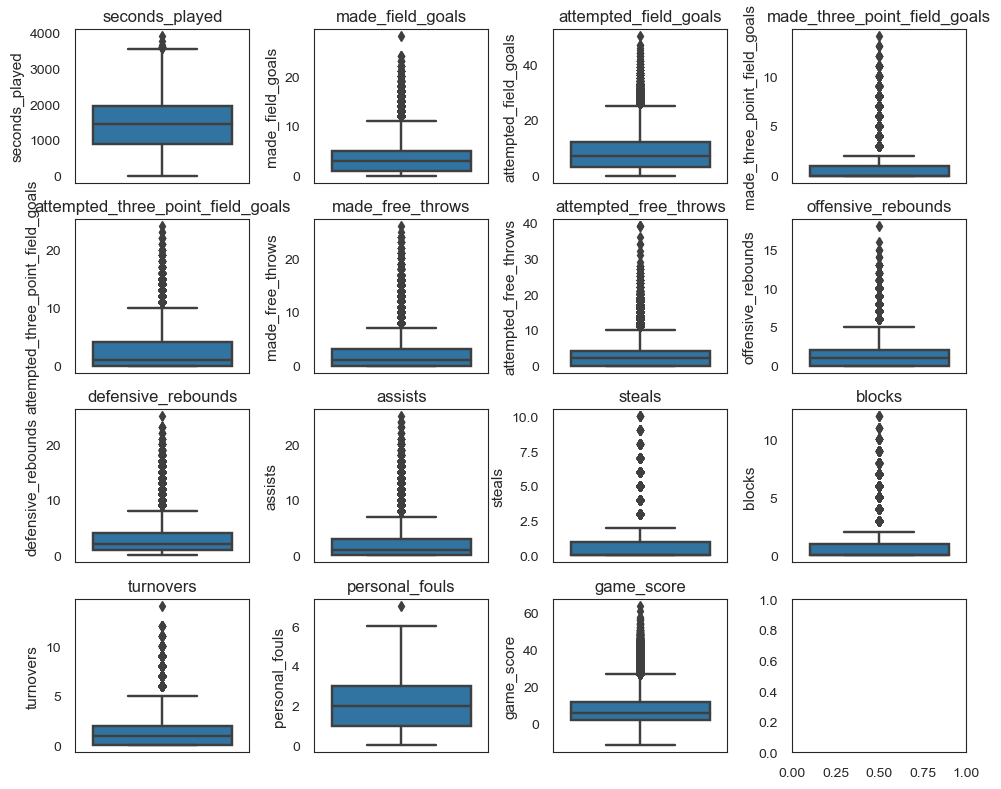

In [22]:
# boxplots for each numeric column
fig, axes = plt.subplots(4, 4, figsize=(10, 8))
for ax, column in zip(axes.flatten(), num_vars_player_bs):
    sns.boxplot(y=column, data=player_bs_df, ax=ax)
    ax.set_title(f'{column}')
plt.tight_layout();

<a name="3.3.-Multivariate-EDA"></a>
## 3.3. Multivariate EDA

[Return to top](#EDA)

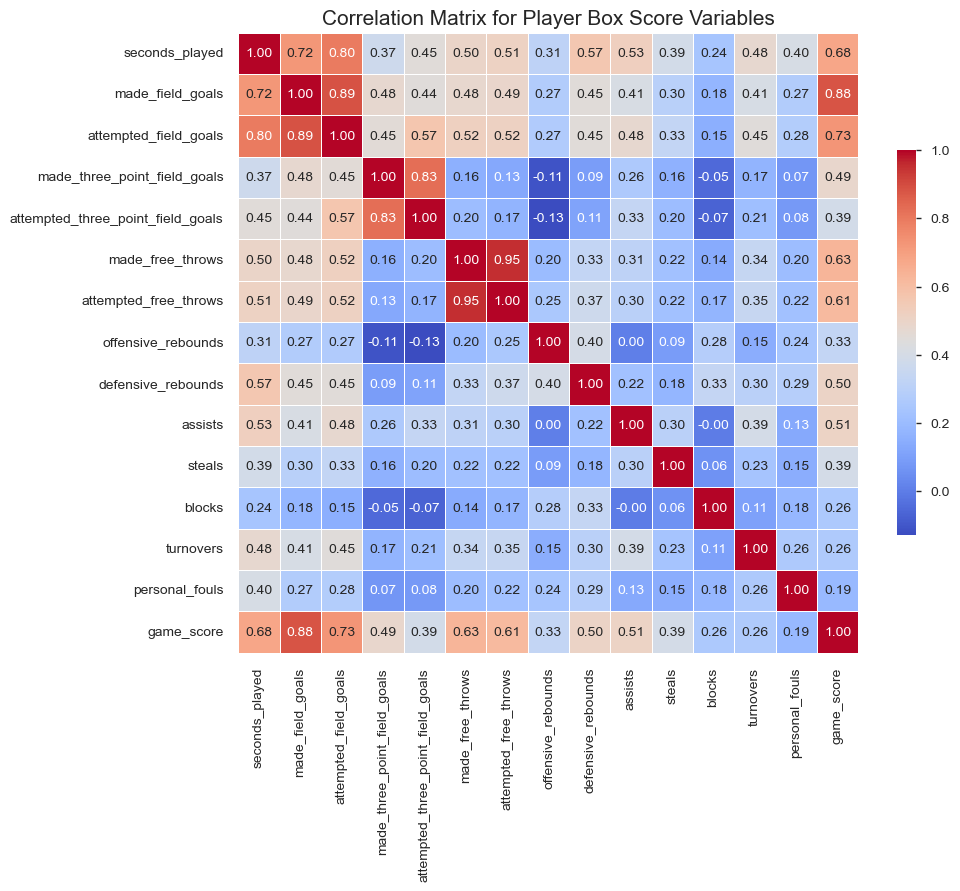

In [7]:
# correlations
plt.figure(figsize=(10, 10))
sns.heatmap(player_bs_df[num_vars_player_bs].corr(), annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for Player Box Score Variables', fontsize=15);

<a name="4.-Player-Season-Totals-(Basic)"></a>
# 4. Player Season Totals (Basic)

[Return to top](#EDA)

<a name="5.-Player-Season-Totals-(Advanced)"></a>
# 5. Player Season Totals (Advanced)

[Return to top](#EDA)